In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
df=pd.read_csv('House_Price_India.csv')
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [14]:
# Features and target
X = df.drop('Price',axis=1)
y= df['Price']

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
c = model.intercept_
m = model.coef_[0]
 
print(f"Equation of the line : y={m:.2f}x+{c:.2f}")

Equation of the line : y=-23.58x+159326047414.90


In [18]:
y_pred = model.predict(X_test)

In [19]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results with formatting
print(f"MAE: {mae:.2f} $100K")
print(f"RMSE: {rmse:.2f} $100K")
print(f"R_Square: {r2:.2f}")

MAE: 105542.36 $100K
RMSE: 187162.35 $100K
R_Square: 0.75


In [21]:
#Residuals
residual=y_test-y_pred
#display
print('\nFirst 5 Rediduals:')
print(pd.DataFrame({'Actual':y_test[:5],'Predicted':y_pred[:5],'Residual':residual[:5]}))


First 5 Rediduals:
       Actual      Predicted       Residual
3837   235000  246046.499603  -11046.499603
4098   552000  654162.581421 -102162.581421
357    615000  580460.522980   34539.477020
11768  555000  545548.341156    9451.658844
9751   649950  581102.461029   68847.538971


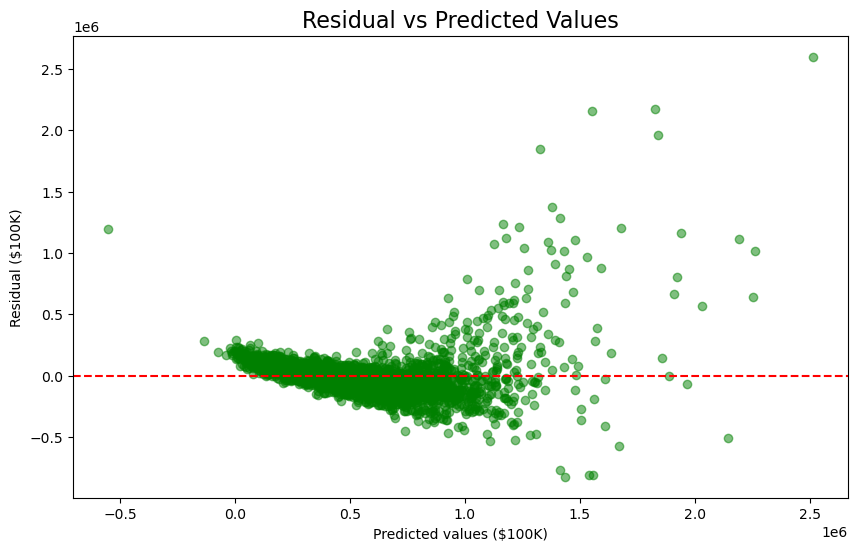

In [22]:
#PLot:Scatter Plot of Residuals
plt.figure(figsize=(10,6))
plt.scatter(y_pred,residual,color='green',alpha=0.5)
plt.axhline(y=0,color='red',linestyle='--')
plt.title('Residual vs Predicted Values',fontsize=16)
plt.xlabel('Predicted values ($100K)')
plt.ylabel('Residual ($100K)')
plt.show()

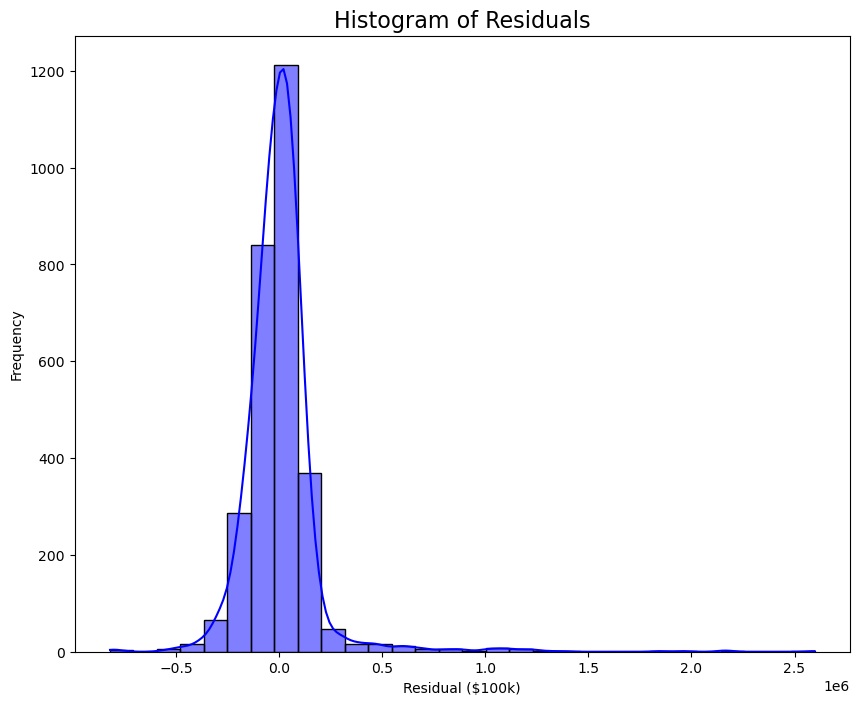

In [23]:
#Plot:Histogram of Residuals
plt.figure(figsize=(10,8))
sns.histplot(residual,bins=30,kde=True,color='blue')
plt.title('Histogram of Residuals',fontsize=16)
plt.xlabel('Residual ($100k)')
plt.ylabel('Frequency')
plt.show()